In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import ast

In [29]:
input_file = "../../rs_usage/metadata/metadata.csv"
metadata = pd.read_csv(input_file, low_memory=False)
metadata.set_index('Unnamed: 0', inplace=True)
forks = metadata["forks_count"]

In [30]:
input_file = "../../rs_usage/info_repos/release_number/release_number.csv"
release = pd.read_csv(input_file, low_memory=False)["url"]

In [31]:
hist_name, hist_count = np.unique(release, return_counts=True)
hist_name = [str(i) for i in hist_name]
numerous_releases = np.sum(hist_count[10:])
hist_name = hist_name[:10]
hist_count = hist_count[:10]
hist_name[-1] = "10+"
hist_count[-1] = numerous_releases

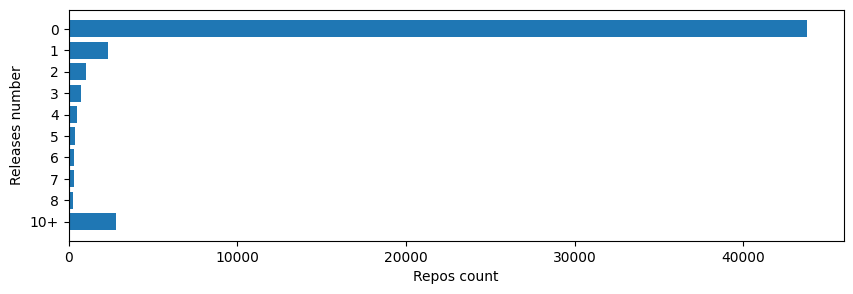

In [32]:
fig, axs = plt.subplots(figsize=(10, 3))
axs.barh(y=hist_name, width=hist_count)
axs.yaxis.set_inverted(True)
axs.set_ylabel("Releases number")
axs.set_xlabel("Repos count")
plt.savefig("../figures/release_count_bar.png")

In [15]:
#forks = np.where(forks>30, 30, forks)

In [33]:
len(release)

52684

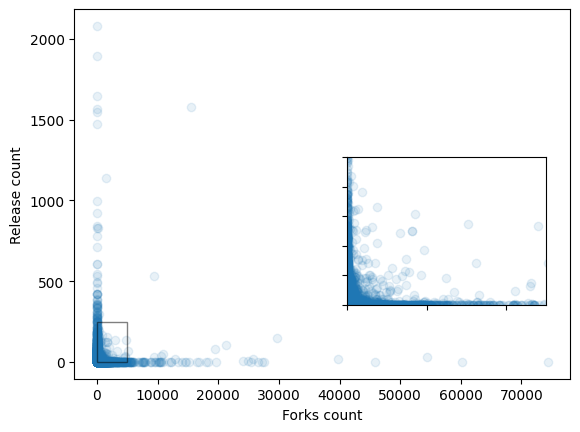

In [39]:
fig, ax = plt.subplots()
ax.scatter(forks, release, alpha=0.1)
ax.set_xlabel("Forks count")
ax.set_ylabel("Release count")

x1, x2, y1, y2 = 0, 5000, 0, 250 # subregion of the original image
axins = ax.inset_axes([0.55, 0.20, 0.4, 0.4],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])

axins.scatter(forks, release, alpha=0.1)
ax.indicate_inset_zoom(axins, edgecolor="k")
plt.savefig("../figures/forks_release.png")

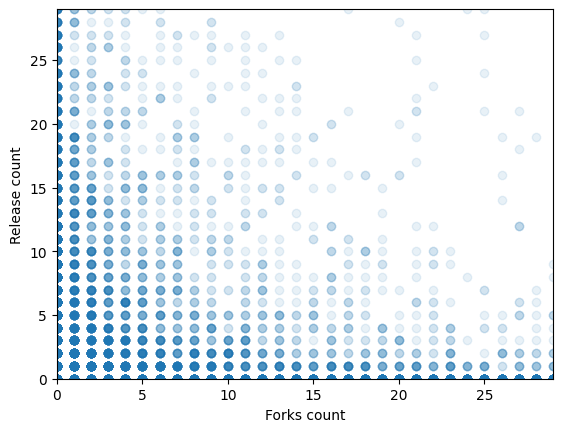

In [18]:
fig, ax = plt.subplots()
ax.scatter(forks, release, alpha=0.1)
ax.set_xlabel("Forks count")
ax.set_ylabel("Release count")
ax.set_xlim(0, 29)
ax.set_ylim(0, 29)
plt.savefig("../figures/release_forks_scatter.png")